In [17]:
import datetime
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import glob
from matplotlib import gridspec
import matplotlib.lines as mlines
import copy

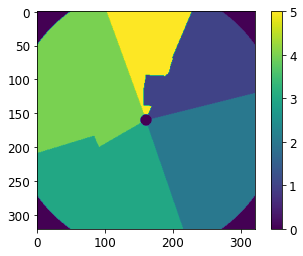

In [18]:
regions = np.array(Dataset(f'/Users/carmennab/Dropbox/michel_csao/regions_EASE.nc',"r")['Regions'])
regs = [1,2,3,4,5,[1,2,3,4,5]]
region_names =['Weddell Sea','King Haakon VII','East Antarctica','Ross and Amundsen Seas',
               'Amundsen-Bellingshausen Sea','All Regions']

plt.imshow(regions)
plt.colorbar()

#0: Ocean / higher latitude
#1: Weddell Sea
#2: King Haakon VII
#3: East Antarctica
#4: Ross and Amundsen Seas
#5: Amundsen-Bellingshausen Sea

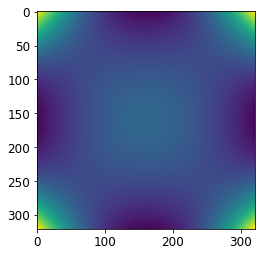

In [19]:
### code stolen from ReadBudgets-Pathfinder.ipynb - is this the right grid?

file = '/Users/carmennab/cpom_server/home/gch/SS_budget_23/grids_S/Pathfinder_gs_SH.npz'
npzfile =  np.load(file)

xdist = npzfile["xdist"]
ydist = npzfile["ydist"]
area=xdist*ydist

plt.imshow(area)

In [20]:
datapath = '/Users/carmennab/cpom_server/home/gch/SS_budget_23/2024-08-15/data_out_smoothed/'
files = sorted(glob.glob(datapath+'*.nc'))

In [21]:
all_budgets = [] 

for file in files:
    start_date_str = file.split('/')[9].split('_')[1].split('--')[0]
    start_date = datetime.datetime.strptime(start_date_str,"%Y%m%d").date()

    data = Dataset(file)

    intensification = np.array(data['intensification']) * 86400 * area
    advection = np.array(data['advection']) * 86400 * area
    divergence = np.array(data['divergence']) * 86400 * area
    residual = np.array(data['residual']) * 86400 * area
    sit = np.array(data['thickness']) 
    conc = np.array(data['concentration']) 

    volume = sit * conc * area

    b = {'year':start_date.year,'month':start_date.month,'intensification':intensification,'advection':advection,
        'divergence':divergence,'residual':residual,'total volume':volume}

    all_budgets.append(b)
        
### create dataframe of all budgets
all_budgets = pd.DataFrame(all_budgets).sort_values(['year','month'])

In [22]:
budget_terms = ['residual','advection','divergence','intensification','total volume']
colors = ['#2b8cbe','#e34a33', '#31a354', '#feb24c', 'k']

In [23]:
figpath = '/Users/carmennab/Dropbox/michel_csao/figures/'

2425.3999263176256
2306.718042030168
3719.022356524567
7030.91628957142
11216.680735592015
15500.592448888916
19184.92543400614
22259.47141877649
22610.77611197826
17114.87917288824
9593.172686250753
5223.363836363098
2990.9088282282514
2730.1429450913774
4062.6185351449703
7187.29258797397
11040.063921082006
15615.1478674157
19096.367699885304
20387.612996472897
19621.911830284644
15750.03883700644
9451.711382476477
4464.227003918213
2111.9259207097834
1588.2053323477676
3009.8409637253744
5826.274021528989
8872.715567571107
12588.503619166806
15069.272804620245
17706.127920064948
16065.173430054721
12240.458299965148
6559.068181092878
2987.1011810803357
1745.9718054560374
1656.1035120652846
2198.66919648767
4083.2560187349955
7183.21152806853
11080.426796465275
14522.36062172229
16442.194365124255
15964.131999571988
10998.425829493313
5898.679398476407
3265.780558138854
1803.6525087393022
1879.7544252115354
2635.339093488395
4189.665367739384
6627.2543160574805
10572.318269065228
144

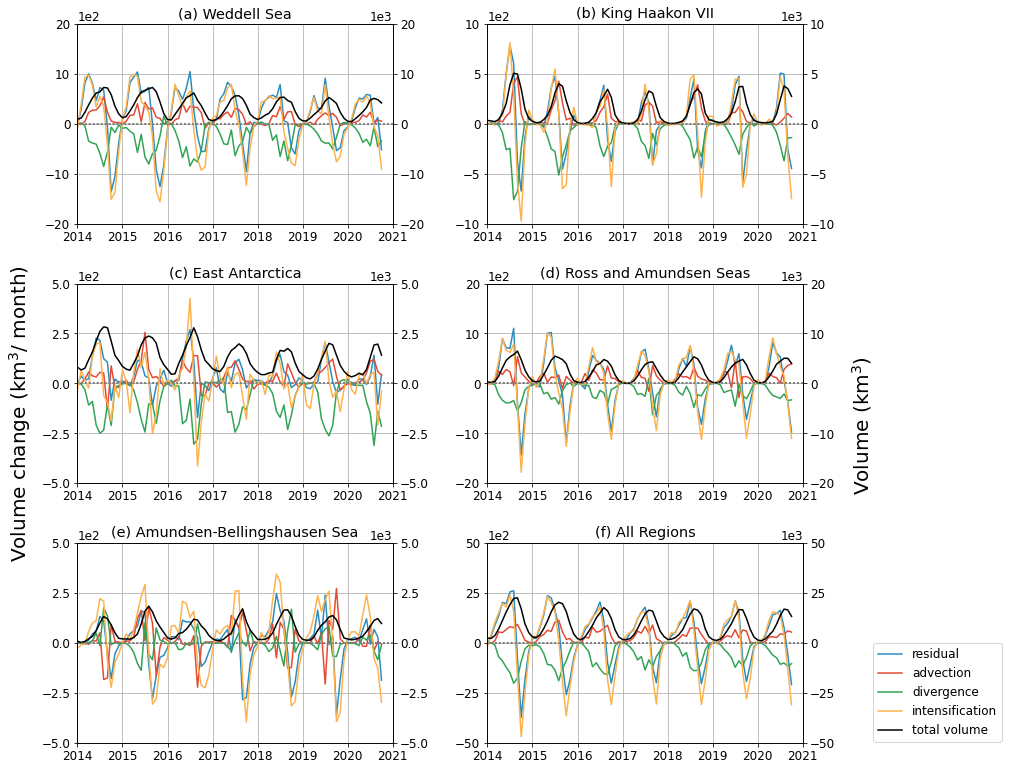

In [25]:
plt.rc('font', size=12)
fig = plt.figure(figsize=(13,18))
spec = gridspec.GridSpec(ncols=2, nrows=4, wspace=0.3,hspace=0.3)
ylims = [[-2000,2000],[-1000,1000],[-500,500],[-2000,2000],[-500,500],[-5000,5000]]
nums = ['(a)','(b)','(c)','(d)','(e)','(f)']

for count,region_name in enumerate(region_names):
    ax = fig.add_subplot(spec[count])
    all_budgets_copy = pd.DataFrame(columns = all_budgets.columns, data = copy.deepcopy(all_budgets.values))

    for color,term in zip(colors,budget_terms):
        budget = np.array(all_budgets_copy[term])
        tots = []
        
        for datapoint in budget:
            datapoint[~np.isin(regions, regs[count])] = np.nan
            tots.append(np.nansum(datapoint)/1e9)
        if term == 'total volume':
             tots = np.divide(tots,10) # easy way to plot tots on same legend
                
        ax.plot(tots,label=term,color=color)
        ax.axhline(0, color='gray', linestyle='dotted')
    if count == 5:
        ax.legend(bbox_to_anchor = (1.65, 0.53))
    ax.grid()
    ax.set_title(f'{nums[count]} {region_name}')
    ax.set_ylim(ylims[count])
    ax.set_yticks([ylims[count][0],ylims[count][0]/2,0,ylims[count][1]/2,ylims[count][1]])
    ax.ticklabel_format(axis='y', style='sci', scilimits=(2,2))
    ax.set_xticks([0, 12, 24, 36, 48, 60, 72,84])
    ax.set_xlim([0,84])
    ax.set_xticklabels(['2014','2015','2016','2017','2018','2019','2020','2021'])
    
    ax2 = ax.twinx()

#     if count in [0,2,4]:
#         ax.set_ylabel('Volume change (km$^{3}$/ month)',labelpad=-5)
#     else:
#         ax2.set_ylabel('Volume (km$^{3}$)',labelpad=5)
    ax2.set_ylim(np.multiply(ylims[count],10))
    ax2.set_yticks(np.multiply([ylims[count][0],ylims[count][0]/2,0,ylims[count][1]/2,ylims[count][1]],10))
    ax2.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
    ax2.set_xticks([0, 12, 24, 36, 48, 60, 72,84])
    
fig.text(0.05, 0.47, 'Volume change (km$^{3}$/ month)', fontsize=20,rotation='vertical')
fig.text(0.95, 0.52, 'Volume (km$^{3}$)', fontsize=20,rotation='vertical')
    
plt.savefig(f'{figpath}budget_timeseries.jpg',bbox_inches = "tight", dpi = 400)

### plot anomalies timeseries

In [9]:
### calculate climatologies
climatologies = []

for month in set(all_budgets['month']):
    budget_m = all_budgets[all_budgets['month']==month]
    row = {'month':month}
    for term in budget_terms:
        climatology = budget_m[term].mean(skipna=True,axis=0)
        row[term] = climatology
    climatologies.append(row)
climatologies = pd.DataFrame(climatologies).sort_values(['month'])

### calculate anomalies
anomalies = []
for index,row in all_budgets.iterrows():
    anom_row = {'month':row['month'],'year':row['year']}
    climatology = climatologies[climatologies['month']==row['month']]
    values_m = all_budgets[all_budgets['month']==row['month']]
    values_ym = values_m[values_m['year']==row['year']]

    for term in budget_terms:
        clim = climatology[term].iloc[0]
        value = values_ym[term].iloc[0]
        anom = value - clim
        anom_row[term] = anom
    anomalies.append(anom_row)
anomalies = pd.DataFrame(anomalies).sort_values(['year','month'])

2.495160920622915
34.33371646200001
164.53249731924328
98.63229358924184
46.93905685836502
31.074000748977955
262.525688509997
1114.267147981486
471.30585021694566
-716.9506654612397
-280.3023858869634
-21.323910075523894
15.758550251551537
6.930987695298702
36.23946920128512
65.99450084018257
343.17511659340903
266.5921306892923
-270.36412295481534
-195.8252149289638
-129.0512820514506
-117.1548824499246
-195.7291807656911
-78.64902717416219
-37.50456511502608
34.44896010724576
150.8149036549718
-93.8065117017177
-104.17987979942968
-4.750118383858812
152.6951874694464
-11.179078037888651
-72.81190975454616
193.74848146453883
68.53516468931372
-0.6280656371056452
28.2376548623245
-16.52422177069525
-12.768235671419216
-47.74044988796618
-192.0219369117588
41.7674554023434
-186.67974142208772
-435.9680593445066
-386.1319733027752
-57.03264203791999
372.0890432473686
75.80216659252444
-1.9218848089489264
44.86308539418494
-18.24751858436686
52.00290652648028
-70.04737911926253
-192.2192

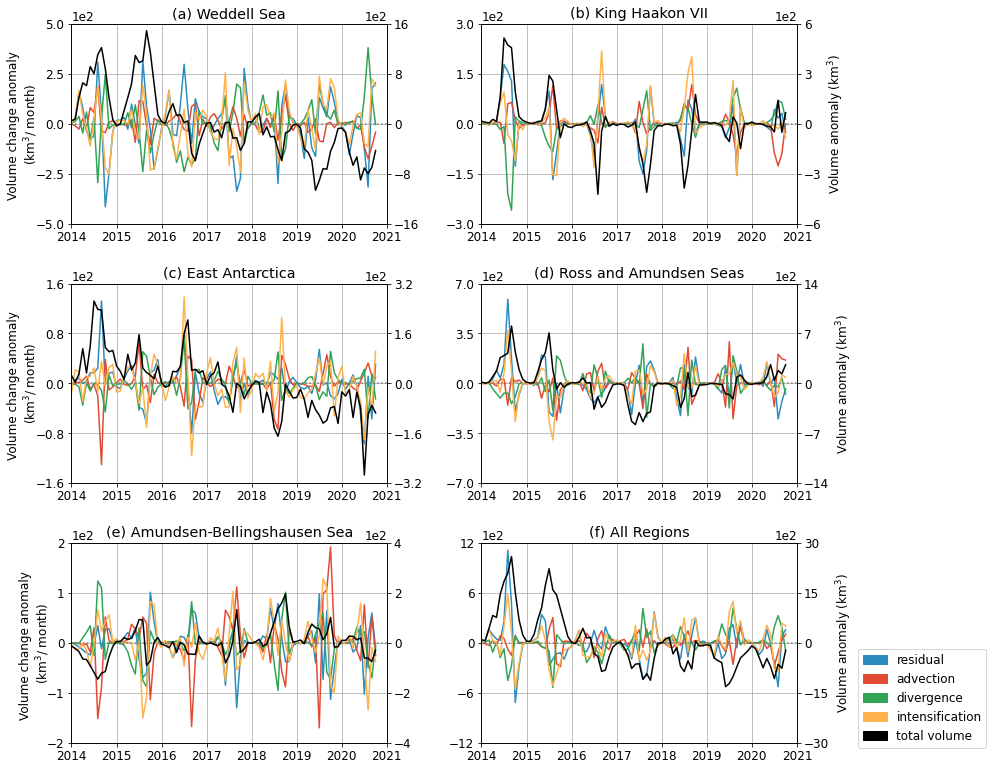

In [13]:
plt.rc('font', size=12)
fig = plt.figure(figsize=(13,18))
spec = gridspec.GridSpec(ncols=2, nrows=4, wspace=0.3,hspace=0.3)
ylims_terms = [[-500,500],[-300,300],[-160,160],[-700,700],[-200,200],[-1200,1200]]
ylims_tots = [[-1600,1600],[ -600,600],[ -320,320],[-1400,1400],[ -400,400],[-3000,3000]]
nums = ['(a)','(b)','(c)','(d)','(e)','(f)']

for count,region_name in enumerate(region_names):
    ax = fig.add_subplot(spec[count])
    anomalies_copy = pd.DataFrame(columns = anomalies.columns, data = copy.deepcopy(anomalies.values))

    for color,term in zip(colors,budget_terms[:-1]):
        budget = np.array(anomalies_copy[term])
    
        tots = []

        for datapoint in budget:
            datapoint[~np.isin(regions, regs[count])] = np.nan
            tots.append(np.nansum(datapoint)/1e9)
            
        ax.plot(tots,label=term,color=color)
    ax.axhline(0, color='gray', linestyle='dotted')
    ax.grid()
    ax.set_title(f'{nums[count]} {region_name}')
    ax.set_ylim(ylims_terms[count])
    ax.set_yticks([ylims_terms[count][0],ylims_terms[count][0]/2,0,ylims_terms[count][1]/2,ylims_terms[count][1]])
    ax.ticklabel_format(axis='y', style='sci', scilimits=(2,2))
    ax.set_xticks([0, 12, 24, 36, 48, 60, 72,84])
    ax.set_xlim([0,84])
    ax.set_xticklabels(['2014','2015','2016','2017','2018','2019','2020','2021'])
    
    ax2 = ax.twinx()
    
    budget = np.array(anomalies_copy['total volume'])
    tots = []

    for datapoint in budget:
        datapoint[~np.isin(regions, regs[count])] = np.nan
        tots.append(np.nansum(datapoint)/1e9)

    ax2.plot(tots,label='total volume',color='k')
        
    if count in [0,2,4]:
        ax.set_ylabel('Volume change anomaly \n(km$^{3}$/ month)',labelpad=-5)
    else:
        ax2.set_ylabel('Volume anomaly (km$^{3}$)',labelpad=5)
        
    ax2.set_ylim(ylims_tots[count])
    ax2.set_yticks([ylims_tots[count][0],ylims_tots[count][0]/2,0,ylims_tots[count][1]/2,ylims_tots[count][1]])
    ax2.ticklabel_format(axis='y', style='sci', scilimits=(2,2))
    ax2.set_xticks([0, 12, 24, 36, 48, 60, 72,84])
    
    ### create legend
    legends = []
    for color,term in zip(colors,budget_terms):
        l = mpatches.Patch(color=color, label=term)
        legends.append(l)
    if count == 5:
        ax2.legend(bbox_to_anchor = (1.62, 0.5),handles=legends)
    
plt.savefig(f'{figpath}budget_timeseries_anoms.jpg',bbox_inches = "tight", dpi = 400)